# The Perceptron: A Perceiving and Recognizing Automaton by F. Rosenblatt, Cornell Aeronautical Laboratory, 1957

With his perceptron rule, Rosenblatt proposed an algorithm
that would ***automatically learn the optimal weight coefficients***<br> would then be multiplied with the
input features in order to make the decision of whether a neuron fires <br>(transmits a signal) or not. In
the context of supervised learning and classification,<br> such an algorithm could then be used to predict
whether a new data point belongs to one class or the other.

In [1]:
import numpy as np
v1=np.array([1,2,3])
v2=0.5 * v1
np.arccos(v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

np.float64(0.0)

In [2]:
import pandas as pd
from perceptron import Perceptron

In [3]:
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/iris/iris.data',
header=None, encoding='utf-8')

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.sample(10)

,0,1,2,3,4
124,6.7,3.3,5.7,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
38,4.4,3.0,1.3,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica
94,5.6,2.7,4.2,1.3,Iris-versicolor


In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index([0, 1, 2, 3, 4], dtype='int64')

In [8]:
df[4].value_counts()

4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Next, we extract the first 100 class labels that correspond to the 50 Iris-setosa and 50 Iris-versicolor
flowers and convert the class labels into the two integer class labels, 1 (versicolor) and 0 (setosa), that
we assign to a vector, y, where the values method of a pandas DataFrame yields the corresponding
NumPy representation.

In [9]:
X=df.iloc[0:100,[0,2]].values

In [10]:
X.shape

(100, 2)

In [11]:
y=df.iloc[0:100,4].values

In [12]:
y.shape

(100,)

In [13]:
y=np.where(y=='Iris-setosa',0,1)

In [14]:
y[0:5]

array([0, 0, 0, 0, 0])

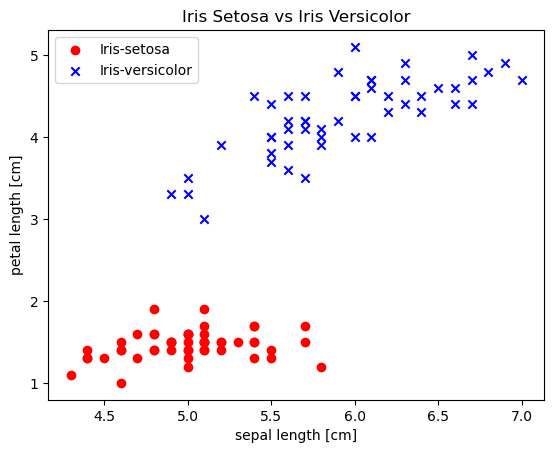

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Iris-setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='Iris-versicolor')
plt.title('Iris Setosa vs Iris Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Now, it’s time to train our perceptron algorithm on the Iris data subset that we just extracted. Also,
we will plot the misclassification error for each epoch to check whether the algorithm converged and
found a decision boundary that separates the two Iris flower classes:

In [16]:
ppn=Perceptron(n_iter=10,lr=0.1)
ppn.fit(X,y)

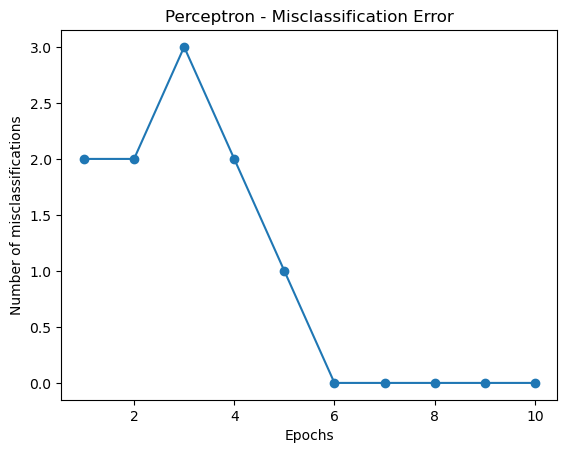

In [17]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron - Misclassification Error')
plt.show()

In [18]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

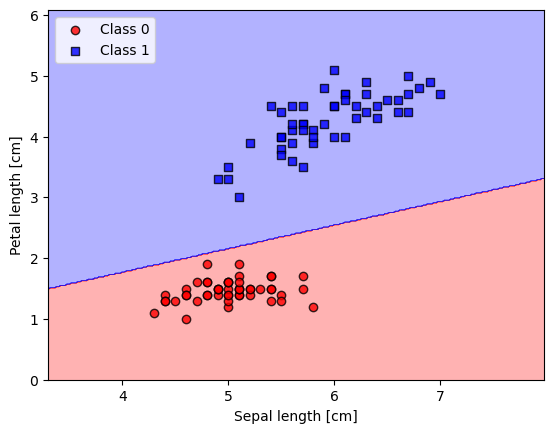

In [19]:

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()
